# Credit Card Fraud Detection

## Exploratory Data Analysis

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load data from CSV file to DataFrame
data = pd.read_csv('creditcard.csv')

In [ ]:
# Get the shape (rows, columns) of the DataFrame
data.shape

(284807, 31)

In [ ]:
# Display summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Display the first 5 row of the DataFrame
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Display the last 5 row of the DataFrame
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Display descriptive statistics for numerical columns in the DataFrame
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Check if there are any missing values in each column of the DataFrame
data.isnull().any()

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


Non-Fraudulent Transactions: 284315 (0.9983%)
Fraudulent Transactions: 492 (0.0017%)


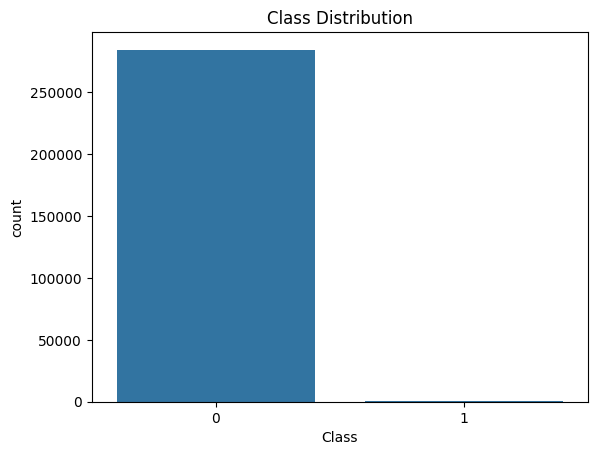

In [ ]:
# Calculate the distribution of the 'Class' column
class_distribution = data['Class'].value_counts()

# Plot the distribution of classes using a count plot
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')

# Calculate total number of transactions
total_transactions = data.shape[0]

# Extract counts for non-fraudulent and fraudulent transactions
non_fraud = class_distribution[0]
fraud = class_distribution[1]

# Print the distribution of non-fraudulent and fraudulent transactions with percentages
print(f'Non-Fraudulent Transactions: {non_fraud} ({(non_fraud / total_transactions):.4f}%)')
print(f'Fraudulent Transactions: {fraud} ({(fraud / total_transactions):.4f}%)')

Text(0.5, 1.0, 'Correlation Heatmap')

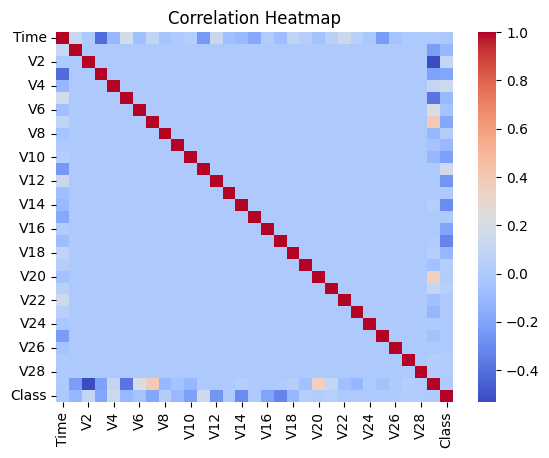

In [ ]:
# Compute the correlation matrix for the DataFrame
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Time vs. Amount')

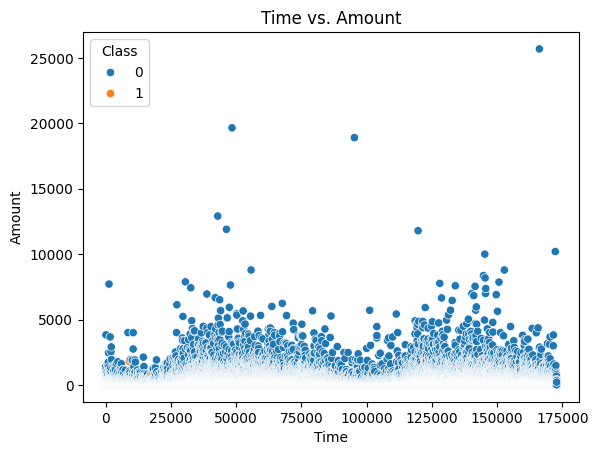

In [ ]:
# Create a scatter plot of 'Time' vs. 'Amount', colored by 'Class'
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data)
plt.title('Time vs. Amount')

## Data Preprocessing

In [ ]:
# Drop the 'Time' column from the DataFrame as it is not relevant for the prediction model
data = data.drop(['Time'], axis=1)

In [ ]:
# Separate features and target variable
x = data.drop('Class', axis=1)
y = data['Class']

# Initialize the SMOTE algorithm with a fixed random seed for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the data and balance the class distribution
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features by scaling them to zero mean and unit variance
x_standardized = scaler.fit_transform(x_smote)

In [ ]:
# Split the standardized data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x_standardized, y_smote, test_size=0.3, random_state=42)

## Predictive Models

### Logistic Regression

In [ ]:
# Initialize the Logistic Regression model with a maximum of 150 iterations for convergence
logr = LogisticRegression(max_iter=150)

# Fit the Logistic Regression model to the training data
logr.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [ ]:
# Predict the class labels for the test data using the trained Logistic Regression model
lr_pred = logr.predict(X_test)

In [ ]:
# Display the classification report to show precision, recall, f1-score, and support for each class
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85149
           1       0.98      0.94      0.96     85440

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



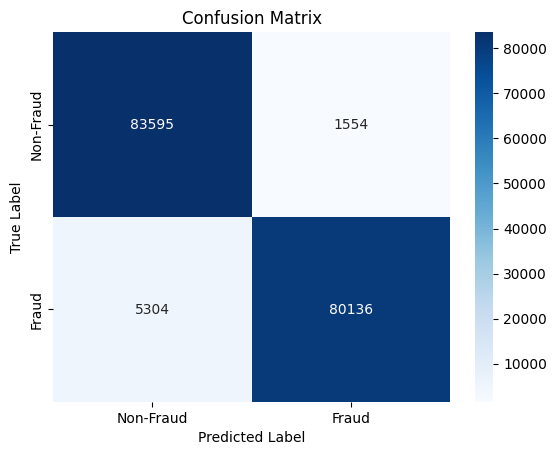

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lr_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, lr_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, lr_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, lr_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9598
Precision: 0.9810
Recall: 0.9379
F1 Score: 0.9590


### Decision Tree

In [ ]:
# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Fit the Decision Tree model to the training data
dtree = dtree.fit(X_train, y_train)

In [ ]:
# Predict the class labels for the test data using the trained Decision Tree model
dt_pred = dtree.predict(X_test)

In [ ]:
# Display the classification report to show precision, recall, f1-score, and support for each class
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



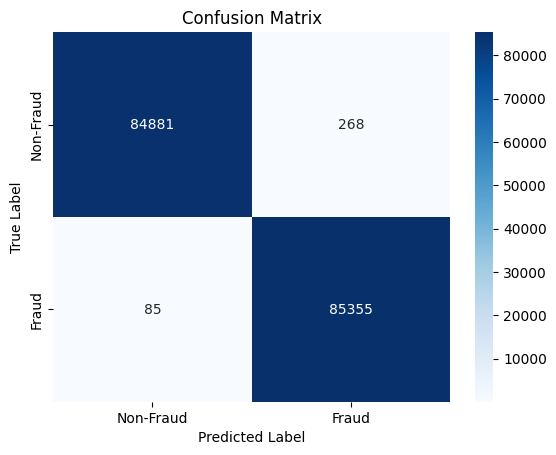

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, dt_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, dt_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, dt_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9979
Precision: 0.9969
Recall: 0.9990
F1 Score: 0.9979


### Random Forest

In [ ]:
# Initialize the Random Forest model
regressor = RandomForestClassifier()

# Fit the Random Forest model to the training data
regressor.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict the class labels for the test data using the trained Random Forest model
rf_pred = regressor.predict(X_test)

In [ ]:
# Display the classification report to show precision, recall, f1-score, and support for each class
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



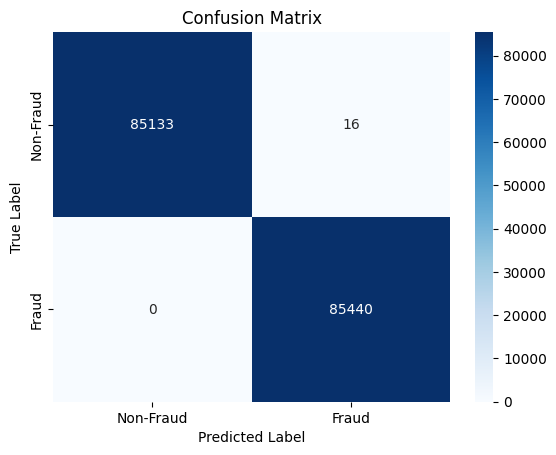

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, rf_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, rf_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, rf_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1 Score: 0.9999
